In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aprildata= pd.read_csv('Downloads/uber-raw-data-apr14.csv')
maydata=pd.read_csv('Downloads/uber-raw-data-may14.csv')
junedata=pd.read_csv('Downloads/uber-raw-data-jun14.csv')
julydata=pd.read_csv('Downloads/uber-raw-data-jul14.csv')
augustdata=pd.read_csv('Downloads/uber-raw-data-aug14.csv')
septemberdata=pd.read_csv('Downloads/uber-raw-data-sep14.csv')

In [3]:
print(aprildata.shape)
aprildata.head()

(564516, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
print(maydata.shape)
maydata.head()

(652435, 4)


,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [5]:
print(junedata.shape)
junedata.head()

(663844, 4)


,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [6]:
print(julydata.shape)
julydata.head()

(796121, 4)


,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [7]:
print(augustdata.shape)
augustdata.head()

(829275, 4)


,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [8]:
print(septemberdata.shape)
septemberdata.head()

(1028136, 4)


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


this data says that the date of the month is not in a proper formate it is in m/date/yr we should have to change in a proper formate

firstly we will make this whole data in a single file

### concating the data

In [9]:
cab_data=pd.concat([aprildata,maydata,junedata,julydata,augustdata,septemberdata],axis=0, ignore_index=True)

In [10]:
cab_data.shape

(4534327, 4)

In [11]:
cab_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [12]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [13]:
cab_data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [14]:
from datetime import datetime

In [15]:
cab_data.rename({'Date/Time':'Date'},axis=1,inplace=True)

In [16]:
cab_data['Date']=pd.to_datetime(cab_data['Date'])

In [17]:
cab_data.head()

,Date,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [18]:
cab_data["Month"] = cab_data["Date"].dt.month_name().str[:3]
cab_data["Day"] = cab_data["Date"].dt.day_name().str[:3]
cab_data["Hour"] = cab_data["Date"].dt.hour
cab_data["Nday"] = cab_data["Date"].dt.day
cab_data["Date"] = cab_data["Date"].dt.date
cab_data.head()

,Date,Lat,Lon,Base,Month,Day,Hour,Nday
0,2014-04-01,40.7690,-73.9549,B02512,Apr,Tue,0,1
1,2014-04-01,40.7267,-74.0345,B02512,Apr,Tue,0,1
2,2014-04-01,40.7316,-73.9873,B02512,Apr,Tue,0,1
3,2014-04-01,40.7588,-73.9776,B02512,Apr,Tue,0,1
4,2014-04-01,40.7594,-73.9722,B02512,Apr,Tue,0,1


### visualization

plotting the rides for the day for 24 hours.

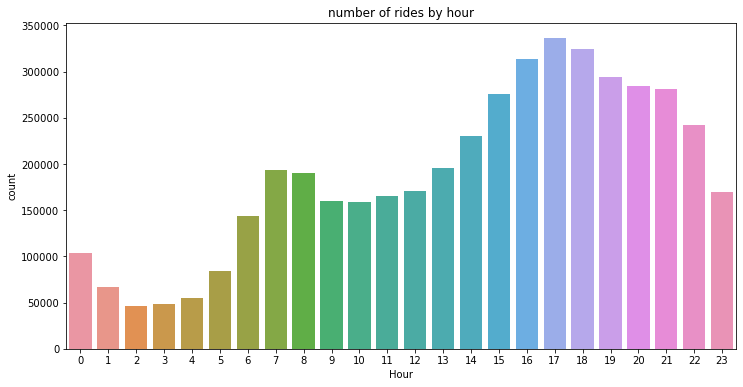

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour',data=cab_data)
plt.title('number of rides by hour')
plt.show()

observation: its pretty clear that the rides are very less between the 12:00 am to 6:00 am
the cab-driver should ride in between 3:00pm to 10:00pm for more profits

### count of rides in a week

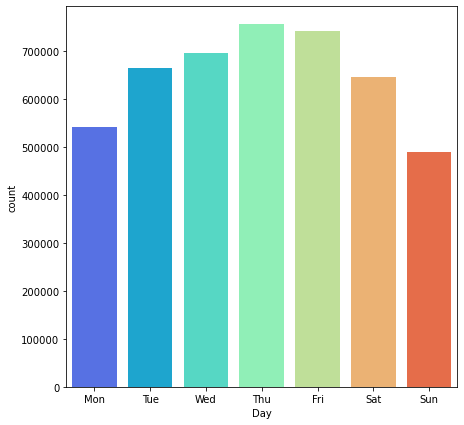

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x='Day',data=cab_data,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='rainbow')
plt.show()

### monthly rides 

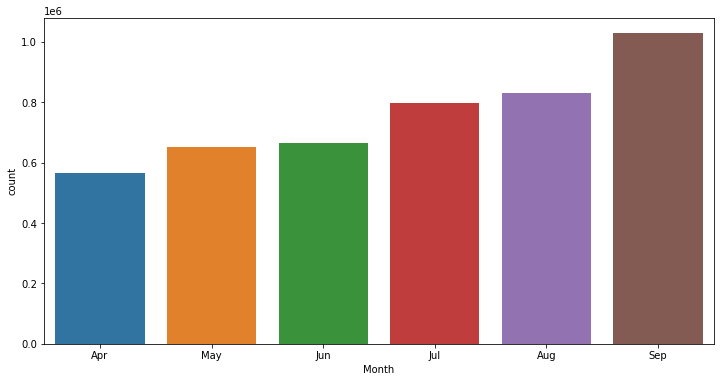

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month',data=cab_data)
plt.show()

### rides in each day for each month

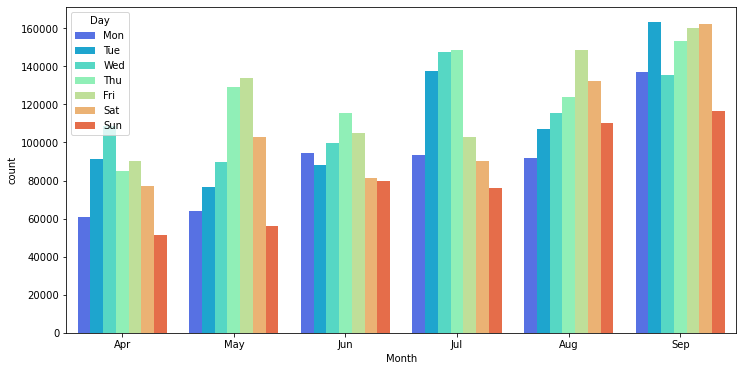

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Month", data = cab_data, hue = "Day", palette = "rainbow", hue_order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.show()

### rides on the base

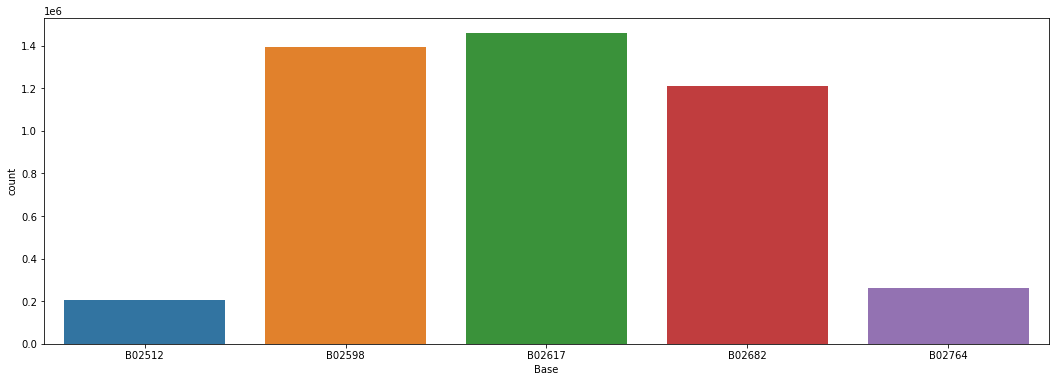

In [23]:
plt.figure(figsize=(18,6))
sns.countplot(x='Base',data=cab_data)
plt.show()

overall observations:
    1.The cab-driver should prefer the riding at the time of eveng like 3:00pm to 10:00pm for more profits.
    2.There are more rides during the week days compared to weekends there are more rides in thursday when we observe compared to sunday
    3.there are more rides in the months of july,august and september compared to april,may,june.
    4.if we see the base observation the are more rides in B02617 and B02598.
so if the cab-driver wants a leave he can take leave in the months of april,may,june and only in the weekends.